### Algorithm 1
##### Initial version

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import tensorly as tl
from sktensor.tucker import hooi
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

In [3]:
#reading data
mat = scipy.io.loadmat('azip.mat')
A = mat['azip'] #matrix 265 x 1707, one column is one digit
mat = scipy.io.loadmat('dzip.mat')
D = mat['dzip'] #matrix 1 x 1707, info about A

k = np.unique(D).size #broj klastera, broj jedinstvenih elementa u D -> ovo zbog općenitosti 


In [4]:
p = 0
for i in range (k):
    A_ = A[:, np.where(D == i)[1]] #daje podmatricu od A čiji stupci odgovaraju točno jednoj znamenci
    T = tl.vec_to_tensor(A_,(16,16,A_.shape[1])) #konstruira tenzor reda 16x16xbroj pojavljivanja te znamenke
    #p += T.shape[2] ovo treba biti 1707, provjera, ovo je ok 
    
    #sad trebam napraviti HOSVD nad tim tenzorom
    

In [76]:
T.shape

(16, 16, 132)

## Algoritam 2

In [5]:
#konstrukcija jednog velikog tenzora
T_main = np.zeros((16,16,1707))

for i in range((A.shape[1])): #za svaki stupac od A
    T_main[:,:,i] = np.reshape(A[:, i], (16,16)) #frontalni odsječak je jedna znamenka
    
#hosvd od glavnog tenzora
#Y = hooi(T, [16, 16, 256], init='nvecs') ovo radi baš sa tenzorima
#istražiti sintaksu!
U1, S1, V1 = np.linalg.svd(tl.unfold(T_main, 1), full_matrices=False) #16x16
U2, S2, V2 = np.linalg.svd(tl.unfold(T_main, 2), full_matrices=False) #16x16
U3, S3, V3 = np.linalg.svd(tl.unfold(T_main, 0), full_matrices=False) #1707 x 256

S_ = tl.tenalg.mode_dot(T_main,np.transpose(U1),mode=1,transpose=False)
S__ = tl.tenalg.mode_dot(S_,np.transpose(U2),mode=2,transpose=False)
S = tl.tenalg.mode_dot(S__,np.transpose(U3),mode=0,transpose=False) #16x16x256

<AxesSubplot:>

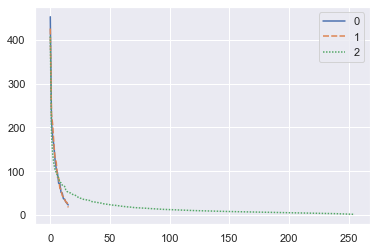

In [19]:
norm_1 = np.zeros(S.shape[0]) #kasnije još ideja za optimizaciju, računati kao sumu dijagonalnih elementa
for i in range(S.shape[0]):
    norm_1[i] = np.linalg.norm(S[i,:,:])

norm_2 = np.zeros(S.shape[1])   
for i in range(S.shape[1]):
    norm_2[i] = np.linalg.norm(S[:,i,:])

norm_3 = np.zeros(S.shape[2])   
for i in range(S.shape[2]):
    norm_3[i] = np.linalg.norm(S[:,:,i])

#ovo možda bolje optimizirati 
df_ = pd.DataFrame(data = {'Mode 1':norm_1, 'Mode 2':norm_2})
df__ = pd.DataFrame(data = {'Mode 3':norm_3})
df = pd.concat([df_,df__], ignore_index=True, axis=1)

sns.lineplot(data = df)
    

In [15]:
df

,Mode 1,Mode 2
0,453.620513,426.591110
1,212.336901,231.074020
2,178.307385,206.454223
3,158.956718,163.373573
4,125.928010,128.675911
5,105.089068,120.539496
6,96.651609,86.138011
7,72.230903,85.001706
8,71.285011,60.700059
9,51.349856,58.458657
